#### Zadak br 6: 

Iskoristiti (ili napisati ponovo) numeričko formalno rešenje JPZ da dobijemo kod koji nam od date funkcije izvora $S(\tau)$ računa srednji intenzitet $J(\tau)$. Za to će nam trebati i numerička integracija po pravcima. 

Kada dobijemo taj kod, iskoristićemo ga proverimo da su li sledeće $S(\tau)$ rešenja Milneovog problema: 

1) $S(\tau) = const$

2) $S(\tau) = F (\tau + 1/2)$ 

3) $S(\tau) = 3F/4 (\tau + 2/3)$

Prvi korak je da iskoristimo rešenje jednačine prenosa zračenja od pretprošlog časa i da ga malo generalizujemo tako da ono može da radi za bilo koje mi. 

In [1]:
# Hajde da prvo importujemo sta nam treba
import numpy as np 
import matplotlib.pyplot as plt 

In [4]:
# Napravimo funkciju koja prima niz tau i odgovarajuci niz S i mi, i onda na osnovu toga racuna sloj-po-sloj resenje JPZ
# a iz same vrednosti mi cemo zakljuciti od koje granice treba da krenemo i koja ce biti vrednost datog intenziteta na toj granici. 

def formalno_resenje(tau, S, mi):

    ND = len(tau) # ovo nam je broj tacaka po dubini

    # Podrazumevani pravac neka nam bude odozdo (tj pocevsi od ND-1), a ako je mi < 0 onda cemo promeniti smer

    start = ND-1
    kraj = 0
    korak = -1

    if (mi < 0):
        start = 0
        kraj = ND-1
        korak = 1

    # Prvo definisemo intenzitet i postavimo granicne uslove:
    Intenzitet = np.zeros(ND)

    # Ako je mi > 0, onda imamo donji granicni uslov:
    Intenzitet[start] = S[start]

    # A ako je m < 0, onda imamo gornji 
    if (mi < 0):
        Intenzitet[start] = 0.0

    for i in range(start+korak, kraj+korak, korak):

        delta_tau = np.abs(tau[i-korak] - tau[i]) / np.abs(mi)
        S_srednje = (S[i-korak] + S[i]) * 0.5

        Intenzitet[i] = Intenzitet[i-korak] * np.exp(-delta_tau) + S_srednje*(1.0 - np.exp(-delta_tau))
 
    return Intenzitet

In [27]:
# Hajde da prvo proverimo da li ovo radi! Najjednostavnije je da samo analiziramo sta se desava sa intenzitetom za neko S = const 

tau = np.linspace(0,3,301)
ND = len(tau)
S = np.zeros(ND)
S[:] = 1.0

mi_test = 1.0

I_test_izlaz = formalno_resenje(tau, S, mi_test)

In [28]:
#I_test

# Dobili smo da je intenzitet u izlaznom pravcu svuda 1, to zvuci ok! Pogledati vezbe broj 4

In [29]:
# Isto to samo za mi = -1
mi_test = -1.0

I_test_ulaz = formalno_resenje(tau, S, mi_test)

In [30]:
#I_test

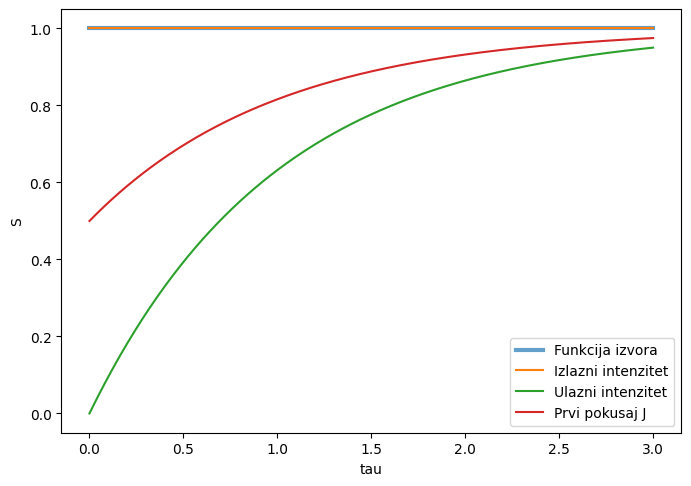

In [31]:
plt.figure(figsize=[8,5.5])
plt.plot(tau, S, linewidth=3, label='Funkcija izvora', alpha =0.7)
plt.plot(tau, I_test_izlaz, label='Izlazni intenzitet')
plt.plot(tau, I_test_ulaz, label='Ulazni intenzitet')
plt.plot(tau, (I_test_izlaz+I_test_ulaz) * 0.5, label = 'Prvi pokusaj J')
plt.xlabel("tau")
plt.ylabel("S")
plt.legend()

##### Već na osnovu ovoga vidimo da S = const, ne može biti rešenje Milneovog problema (a to smo znali i ranije zato što je konstantno S u stvari termalna ravnoteža, tj. ACT, a znamo da onda ne bi bilo prenošenja energije tj. fluks bi bio nula).

In [46]:
# U principu mi mozemo vec na osnovu ovog aproksimativnog J da procenimo koliko su nam dobra druga resenja. 
# Medjutim, mi cemo iskoristiti ovu priliku da se podsetimo Gaus-Lezandrove integracije, pa da resimo ovo malo ozbiljnije.

# Koristimo npr G-L integraciju u 3 tacke (to je 3 izlazne i 3 ulazne). Pogledacemo vrednosti sa vikipedije, ali cemo 
# iskoristiti np da nam da te vrednosti direktno ovde: 

mi, wmi = np.polynomial.legendre.leggauss(3)
print (mi)
print (wmi)

# Moramo da trasnformisemo ovde mi i wmi iz intervale [-1,1] u [0,1]. 
# to cemo uraditi ovako: 


mi = 0.5 * (mi + 1.0)
wmi = wmi * 0.5 # Ovo nam obracunava onih 1/2 koje stoje ispred definicije za J
print(mi)

[-0.77459667  0.          0.77459667]
[0.55555556 0.88888889 0.55555556]
[0.11270167 0.5        0.88729833]


In [47]:
# Sta cemo sada da uradimo, sada cemo da izracunamo J na osnovu nekog S.
# Testirajmo ponovo na S = const
S = np.zeros(ND)
S[:] = 1.0
J = np.zeros(ND)
#print (J)

# Za svako mi resimo ulazni i izlazni intenzitet:

for m in range(0, len(mi)):

    I_izlaz_mi = formalno_resenje(tau, S, mi[m])
    I_ulaz_mi = formalno_resenje(tau, S, -mi[m])

    J += (0.5 * (I_izlaz_mi+I_ulaz_mi)) * wmi[m]


In [48]:
print(J)

[0.5        0.51774948 0.5343931  0.5500178  0.56470326 0.57852252
 0.59154255 0.60382473 0.61542537 0.6263961  0.6367843  0.6466334
 0.65598328 0.66487054 0.67332878 0.68138882 0.689079   0.69642533
 0.70345173 0.71018015 0.71663082 0.72282229 0.72877167 0.73449467
 0.74000578 0.74531834 0.75044462 0.75539595 0.76018277 0.76481473
 0.76930072 0.77364895 0.77786701 0.78196194 0.78594022 0.78980787
 0.79357047 0.79723318 0.80080081 0.8042778  0.80766831 0.81097618
 0.814205   0.81735812 0.82043865 0.8234495  0.82639341 0.82927292
 0.83209041 0.83484813 0.83754818 0.84019254 0.84278305 0.84532149
 0.84780949 0.85024863 0.85264037 0.85498612 0.8572872  0.85954487
 0.86176032 0.86393469 0.86606907 0.86816449 0.87022193 0.87224235
 0.87422663 0.87617565 0.87809024 0.87997119 0.88181928 0.88363523
 0.88541976 0.88717356 0.88889728 0.89059156 0.89225702 0.89389426
 0.89550386 0.89708637 0.89864234 0.9001723  0.90167677 0.90315623
 0.90461117 0.90604206 0.90744937 0.90883354 0.910195   0.91153

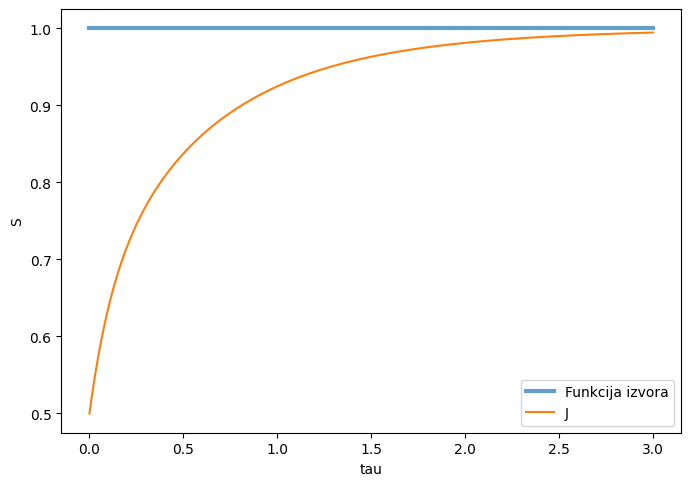

In [49]:
plt.figure(figsize=[8,5.5])
plt.plot(tau, S, linewidth=3, label='Funkcija izvora', alpha =0.7)
plt.plot(tau, J, label = 'J')
plt.xlabel("tau")
plt.ylabel("S")
plt.legend()

Ovo ima smisla pa sada mozemo da testiramo Svarcshield Shusterovo i Eddingtonovo resenje!

U principu kod se moze spakovati da racuna J od S (kao lambda operator, satro), ali mi cemo samo uraditi to pesaka kao sto smo radili gore

In [50]:
# Prvo imamo S = F (tau + 1/2). Ovo F ne igra nikakvu ulogu zato sto je resenje liearno po S

S = np.zeros(ND)
S[:] = tau[:] + 0.5
J = np.zeros(ND)
#print (J)

# Za svako mi resimo ulazni i izlazni intenzitet:

for m in range(0, len(mi)):

    I_izlaz_mi = formalno_resenje(tau, S, mi[m])
    I_ulaz_mi = formalno_resenje(tau, S, -mi[m])

    J += (0.5 * (I_izlaz_mi+I_ulaz_mi)) * wmi[m]

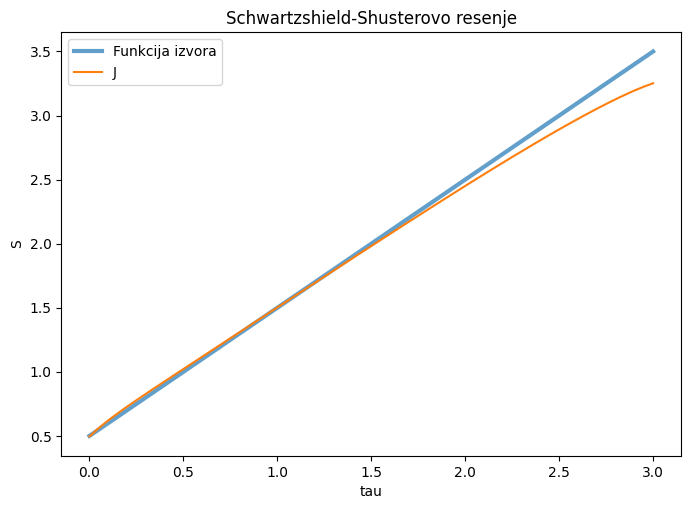

In [51]:
plt.figure(figsize=[8,5.5])
plt.plot(tau, S, linewidth=3, label='Funkcija izvora', alpha =0.7)
plt.plot(tau, J, label = 'J')
plt.title("Schwartzshield-Shusterovo resenje")
plt.xlabel("tau")
plt.ylabel("S")
plt.legend()

In [52]:
# Prvo imamo S =3F/4 (tau + 2/3). Ovo 3F/4 ne igra nikakvu ulogu zato sto je resenje liearno po S

S = np.zeros(ND)
S[:] = tau[:] + 2.0/3.0
J = np.zeros(ND)
#print (J)

# Za svako mi resimo ulazni i izlazni intenzitet:

for m in range(0, len(mi)):

    I_izlaz_mi = formalno_resenje(tau, S, mi[m])
    I_ulaz_mi = formalno_resenje(tau, S, -mi[m])

    J += (0.5 * (I_izlaz_mi+I_ulaz_mi)) * wmi[m]

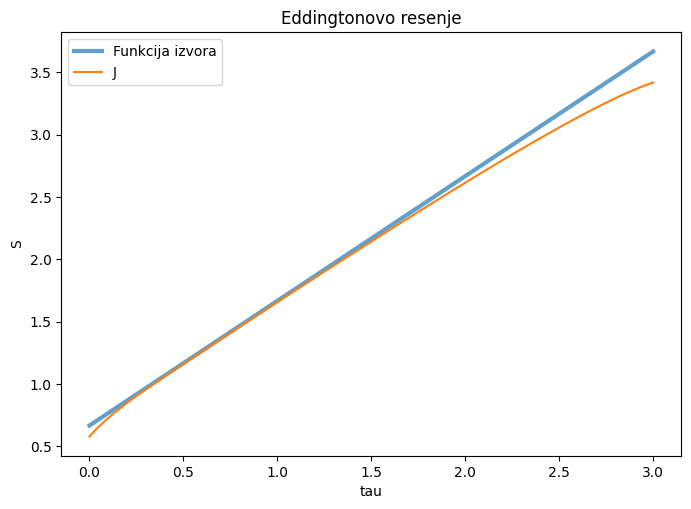

In [53]:
plt.figure(figsize=[8,5.5])
plt.plot(tau, S, linewidth=3, label='Funkcija izvora', alpha =0.7)
plt.plot(tau, J, label = 'J')
plt.title("Eddingtonovo resenje")
plt.xlabel("tau")
plt.ylabel("S")
plt.legend()